In [ ]:
import numpy as np
import pandas as pd

In [ ]:
x = np.array(range(1,11))

In [ ]:
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
y = np.array([1.5,1.8,2.5,2.3,2.5,3.8,4.1,4.9,5.5,6.8])

In [ ]:
y

array([1.5, 1.8, 2.5, 2.3, 2.5, 3.8, 4.1, 4.9, 5.5, 6.8])

In [ ]:
np.corrcoef(x,y)

array([[1.        , 0.96747495],
       [0.96747495, 1.        ]])

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(x,y) # so p-value here e^-06 means 0.00000470 which is less than 0.05 so the correlation between x and y is significant

(0.9674749453869214, 4.7075816910970795e-06)

In [ ]:
# If data is in ordinal scale then we go for spearman Ranks Correlation
# If data is Nominal we go for Kendall Correlation coefficient
# Produt Moment Correlation is other name for Kearl Pearsons correlation coefficient

In [ ]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [ ]:
np.linalg.det(x)

6.66133814775094e-16

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
can = load_boston()

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data = can.data,columns= can.feature_names)

In [ ]:
df['medv'] = can.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.iloc[:,:-1]
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
y = df.iloc[:,-1]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
x_train.shape

(354, 13)

In [ ]:
y_train.shape

(354,)

In [ ]:
x_test.shape

(152, 13)

In [ ]:
y_test.shape

(152,)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
def outlier(x):
    out = []
    q1 = x.quantile(0.25)
    q2 = x.quantile(0.50)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    up_lim = q3 + (1.5*iqr)
    low_lim = q1 - (1.5*iqr)
    for i,j in enumerate(x):
        if (j > up_lim) | (j < low_lim):
            out.append(i)
    return out            

In [ ]:
outlier(df['medv'])

[97,
 98,
 157,
 161,
 162,
 163,
 166,
 179,
 180,
 182,
 186,
 190,
 195,
 202,
 203,
 204,
 224,
 225,
 226,
 228,
 232,
 233,
 253,
 256,
 257,
 261,
 262,
 267,
 268,
 280,
 282,
 283,
 291,
 368,
 369,
 370,
 371,
 372,
 398,
 405]

In [ ]:
def zscore(x):
    out = []
    mu = x.mean()
    standev = x.std()
    for i,j in enumerate(x):
        k = (j - mu)/standev
        if (k > 3) | (k < -3):
            out.append(i)
    return out        

In [ ]:
zscore(df.medv) # Zscore will now show outlier since skewness is less it will show only when skewness is large

[]

In [ ]:
df_1 = df.drop(outlier(df['medv']))

In [ ]:
df_1.shape,df.shape

((466, 14), (506, 14))

In [ ]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state = 0)

In [ ]:
x_train.shape,y_train.shape

((326, 13), (326,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lmodel = LinearRegression()

In [ ]:
lmodel.fit(x_train,y_train)

LinearRegression()

In [ ]:
lmodel.coef_

array([-1.21213498e-01,  4.00319102e-02, -5.31177832e-02,  1.46950789e+00,
       -1.10659564e+01,  1.90606341e+00, -2.50256867e-02, -1.24184194e+00,
        2.02732978e-01, -1.03844611e-02, -6.91807487e-01,  8.60660079e-03,
       -4.05648086e-01])

In [ ]:
coeff = pd.DataFrame(data=lmodel.coef_,index=x_train.columns, columns= ['Coefficients'])

In [ ]:
coeff

,Coefficients
CRIM,-0.121213
ZN,0.040032
INDUS,-0.053118
CHAS,1.469508
NOX,-11.065956
RM,1.906063
AGE,-0.025026
DIS,-1.241842
RAD,0.202733
TAX,-0.010384


In [ ]:
lmodel.intercept_

39.690793086069185

In [ ]:
pred_train = lmodel.predict(x_train)
pred_test = lmodel.predict(x_test)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))

In [ ]:
print('RMSE for Train',rmse_train)
print('RMSE for Test',rmse_test)

RMSE for Train 2.9799706683277045
RMSE for Test 3.5758338401359366


In [ ]:
df.to_excel("boston.xlsx")

In [ ]:
df.to_csv('Boston_Housing.csv')

# 9/4/20 79th video

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [ ]:
bost = load_boston()

In [ ]:
df = pd.DataFrame(data=bost.data,columns=bost.feature_names)

In [ ]:
df['medv'] = bost.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Here CHAS shoud be catogorical but since it is 1 and 0 it is coming as float
# Object mean it can allow null values we can do mathematical ooperations on it
# Catogorical wont allow null values in it we can do mathematical operations on it

In [ ]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
medv       float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
cat_col = list(map(lambda x:x.lower(),df.columns))

In [ ]:
cat_col

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

In [ ]:
df.columns = cat_col

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df['chas'] = df['chas'].astype(object)

In [ ]:
df['chas'].value_counts()

0.0    471
1.0     35
Name: chas, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    object 
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(13), object(1)
memory usage: 55.5+ KB


In [ ]:
pd.get_dummies(df,drop_first=True)  # Here chas alone will get dummification since it is an object variable

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,chas_1.0
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,0


In [ ]:
df = pd.get_dummies(df,drop_first=True) # Only object variables we can do dummification since then only we can do mathematical operations on it and find coefficients
# If its catogory then we can perform maths operation then we cannot calc beta coefficents using that variable

In [ ]:
df.columns = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'chas_1'] # since here dummy is created as chas_1.0 variable shouldnt have . init so we rename it

In [ ]:
df.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'chas_1'],
      dtype='object')

In [ ]:
from scipy.stats import kstest,anderson,shapiro

In [ ]:
kstest(df['medv'],'norm') # Here pval is 0 so we reject null that is Ho : y is normal that is y is not normal
# Here it is against our assumption but we proceed since it gives only an idea this may be not normal due to leverage point also

KstestResult(statistic=0.9999997133484281, pvalue=0.0)

In [ ]:
anderson(df['medv']) # Rejecting Ho

AndersonResult(statistic=11.822483502722775, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
shapiro(df['medv']) # Rejecting Ho

ShapiroResult(statistic=0.91717529296875, pvalue=4.940618243974614e-16)

In [ ]:
# Before model building we need to check the Linearity of x and y using correlation or using scatter plot
# And normality of the y variable

In [ ]:
x = df[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'chas_1']]

In [ ]:
y = df['medv']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
train_data = pd.concat((x_train,y_train),axis=1)
train_data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,chas_1,medv
141,1.62864,0.0,21.89,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,0,14.4
272,0.11460,20.0,6.96,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,0,24.4
135,0.55778,0.0,21.89,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,0,18.1
298,0.06466,70.0,2.24,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97,0,22.5
122,0.09299,0.0,25.65,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,0,20.5


In [ ]:
test_data = pd.concat((x_test,y_test),axis=1)
test_data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,chas_1,medv
329,0.06724,0.0,3.24,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,0,22.6
371,9.23230,0.0,18.10,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,0,50.0
219,0.11425,0.0,13.89,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,1,23.0
403,24.80170,0.0,18.10,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,0,8.3
78,0.05646,0.0,12.83,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,0,21.2


In [ ]:
from statsmodels.formula.api import ols

In [ ]:
lm = ols('medv~crim+zn+indus+nox+rm+age+dis+rad+tax+ptratio+b+lstat+chas_1',data = train_data).fit() # formula method

In [ ]:
for i in x_train.columns:
    print(i,end='+')

crim+zn+indus+nox+rm+age+dis+rad+tax+ptratio+b+lstat+chas_1+

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     84.92
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           2.76e-98
Time:                        10:56:23   Log-Likelihood:                -1032.2
No. Observations:                 354   AIC:                             2092.
Df Residuals:                     340   BIC:                             2147.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.9371      5.876      6.457      0.000      26.380      49.494
crim          -0.1213      0.038     -3.185      0.002      -0.196      -0.046
zn             0.0445      0.016      2.834      0.005       0.014       0.075
indus          0.0113      0.068      0.166      0.868      -0.123       0.146
nox          -16.2313      4.487     -3.618      0.000     -25.056      -7.406
rm             3.8591      0.491      7.867      0.000       2.894       4.824
age           -0.0100      0.016     -0.634      0.527      -0.041       0.021
dis           -1.5003      0.234     -6.402      0.000      -1.961      -1.039
rad            0.2421      0.077      3.152      0.002       0.091       0.393
tax           -0.0111      0.004     -2.586      0.010      -0.019      -0.003
ptratio       -1.0178      0.150     -6.803      0.000      -1.312      -0.723
b              0.0068      0.003      2.099      0.037       0.000       0.013
lstat         -0.4867      0.060     -8.068      0.000      -0.605      -0.368
chas_1         2.5112      1.011      2.483      0.014       0.522       4.501
==============================================================================
Omnibus:                      133.612   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              634.086
Skew:                           1.547   Prob(JB):                    2.04e-138
Kurtosis:                       8.781   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print(lm.summary()) # F-statistic:84.92 (Anova F statis) prob of F-statis is < 0 so we reject Ho so over all the model is a siggnificant model
# Degree of Freedom is n-k-1 so 340(no of observation - no of independent variable - 1)
# AIC and BIC should be least it is a relative measure so we need another model to compare
# Covariance Type:nonrobust (parametric model that is conventional statiscal method)
# Here we cannot compare which coefficient is having higher influence since all variables are in different units so to over come this we need to scaling of idependent variable

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     84.92
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           2.76e-98
Time:                        10:56:30   Log-Likelihood:                -1032.2
No. Observations:                 354   AIC:                             2092.
Df Residuals:                     340   BIC:                             2147.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.9371      5.876      6.457      0.0

In [ ]:
import sklearn.preprocessing as sp

In [ ]:
sc = sp.StandardScaler() # standard scalar is a preprocessing since we are doing before model building

In [ ]:
sc.fit(x_train) # Building the model that is finding x_train mean and stdev for each and every variable will be stored in the model but for x_test we need to use this mean and stdev only
# that is we should not fit x_test then x_test mean and STdev will be stored
# Here sc will have mean and stdev values for every variable
# I use x_trains mu and stdev on x_test to find standard values of x_test to have less variance

StandardScaler()

In [ ]:
scale_train = sc.transform(x_train) # here transform will take mean and variance for corresponding variable 
scale_train

array([[-0.20735619, -0.49997924,  1.54801583, ...,  0.42454294,
         3.10807269, -0.26360274],
       [-0.38886492,  0.34677427, -0.58974728, ...,  0.40185312,
        -0.66643035, -0.26360274],
       [-0.33573486, -0.49997924,  1.54801583, ...,  0.39846135,
         0.63936662, -0.26360274],
       ...,
       [-0.38450355, -0.49997924, -0.15303077, ...,  0.39659002,
        -0.30284441, -0.26360274],
       [-0.37511786, -0.49997924, -0.59690657, ...,  0.37588849,
         0.89967717, -0.26360274],
       [-0.38592298, -0.49997924, -1.00641779, ...,  0.42454294,
         0.31822262, -0.26360274]])

In [ ]:
train_data = pd.DataFrame(scale_train,columns=x_train.columns)
train_data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,chas_1
0,-0.207356,-0.499979,1.548016,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073,-0.263603
1,-0.388865,0.346774,-0.589747,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430,-0.263603
2,-0.335735,-0.499979,1.548016,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367,-0.263603
3,-0.394852,2.463658,-1.265584,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896,-0.263603
4,-0.391456,-0.499979,2.086394,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596,-0.263603


In [ ]:
scale_test = sc.transform(x_test)

In [ ]:
test_data = pd.DataFrame(scale_test,columns=x_test.columns)
test_data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,chas_1
0,-0.394543,-0.499979,-1.122398,-0.832472,0.035054,-1.849868,0.703305,-0.618160,0.165643,-0.708229,0.170861,-0.721605,-0.263603
1,0.704199,-0.499979,1.005342,0.648852,-0.131847,1.107402,-1.256023,1.691377,1.551016,0.777144,0.064898,-0.411779,-0.263603
2,-0.388907,-0.499979,0.402530,-0.052828,0.092114,0.835962,-0.193322,-0.502683,-0.738371,-0.933285,0.387584,-0.274550,3.793587
3,2.570716,-0.499979,1.005342,1.185940,-1.368622,0.964539,-0.997540,1.691377,1.551016,0.777144,0.424543,1.036906,-0.263603
4,-0.395835,-0.499979,0.250753,-1.031715,-0.109022,-0.546240,0.606198,-0.502683,-0.022204,0.101975,0.301737,-0.014239,-0.263603


In [ ]:
train_data['medv'] = y_train.values

In [ ]:
test_data['medv'] = y_test.values

In [ ]:
train_data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,chas_1,medv
0,-0.207356,-0.499979,1.548016,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073,-0.263603,14.4
1,-0.388865,0.346774,-0.589747,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430,-0.263603,24.4
2,-0.335735,-0.499979,1.548016,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367,-0.263603,18.1
3,-0.394852,2.463658,-1.265584,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896,-0.263603,22.5
4,-0.391456,-0.499979,2.086394,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596,-0.263603,20.5


In [ ]:
test_data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,chas_1,medv
0,-0.394543,-0.499979,-1.122398,-0.832472,0.035054,-1.849868,0.703305,-0.618160,0.165643,-0.708229,0.170861,-0.721605,-0.263603,22.6
1,0.704199,-0.499979,1.005342,0.648852,-0.131847,1.107402,-1.256023,1.691377,1.551016,0.777144,0.064898,-0.411779,-0.263603,50.0
2,-0.388907,-0.499979,0.402530,-0.052828,0.092114,0.835962,-0.193322,-0.502683,-0.738371,-0.933285,0.387584,-0.274550,3.793587,23.0
3,2.570716,-0.499979,1.005342,1.185940,-1.368622,0.964539,-0.997540,1.691377,1.551016,0.777144,0.424543,1.036906,-0.263603,8.3
4,-0.395835,-0.499979,0.250753,-1.031715,-0.109022,-0.546240,0.606198,-0.502683,-0.022204,0.101975,0.301737,-0.014239,-0.263603,21.2


In [ ]:
lm_s = ols('medv~crim+zn+indus+nox+rm+age+dis+rad+tax+ptratio+b+lstat+chas_1',data = train_data).fit()

In [ ]:
print(lm_s.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     84.92
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           2.76e-98
Time:                        10:57:15   Log-Likelihood:                -1032.2
No. Observations:                 354   AIC:                             2092.
Df Residuals:                     340   BIC:                             2147.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.7455      0.242     93.880      0.0

In [ ]:
lm_s.summary() #Durbin-Watson: 2.019 approx equal to 2 so no auto correlation
# Prob(Omnibus):0.000 (tells abt overall significance of the model) We reject Ho so model is significant
# Prob(JB):2.04e-138 (Tells about normality of error term) We reject Ho error is not normal. 
# Still there is a chance of increasing the variability in the model
# Cond. No. 9.79 it tell abt multi collinearity, it should be less for no multi collinearity

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     84.92
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           2.76e-98
Time:                        10:57:20   Log-Likelihood:                -1032.2
No. Observations:                 354   AIC:                             2092.
Df Residuals:                     340   BIC:                             2147.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.7455      0.242     93.880      0.000      22.269      23.222
crim          -1.0119      0.318     -3.185      0.002      -1.637      -0.387
zn             1.0503      0.371      2.834      0.005       0.321       1.779
indus          0.0792      0.478      0.166      0.868      -0.861       1.019
nox           -1.8737      0.518     -3.618      0.000      -2.892      -0.855
rm             2.7053      0.344      7.867      0.000       2.029       3.382
age           -0.2796      0.441     -0.634      0.527      -1.148       0.588
dis           -3.0977      0.484     -6.402      0.000      -4.049      -2.146
rad            2.0969      0.665      3.152      0.002       0.788       3.405
tax           -1.8861      0.729     -2.586      0.010      -3.320      -0.452
ptratio       -2.2611      0.332     -6.803      0.000      -2.915      -1.607
b              0.5826      0.278      2.099      0.037       0.037       1.129
lstat         -3.4405      0.426     -8.068      0.000      -4.279      -2.602
chas_1         0.6190      0.249      2.483      0.014       0.129       1.109
==============================================================================
Omnibus:                      133.612   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              634.086
Skew:                           1.547   Prob(JB):                    2.04e-138
Kurtosis:                       8.781   Cond. No.                         9.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=[]
for i in range(train_data.iloc[:,:-1].shape[1]):
    v = variance_inflation_factor(train_data.iloc[:,:-1].values,i) #vif takes 2 arguments (exog values,exog_col_index)
    vif.append(v) # so here it takes one variable and compare it with rest of all the other variables that will be taken care by vif
    #Note that which ever variable vif took that variables col wont be considered with itself while checking multicollinearity

In [ ]:
len(train_data.iloc[:,:-1].columns),train_data.iloc[:,:-1].shape[1]

(13, 13)

In [ ]:
vif_df = pd.DataFrame(vif,index=train_data.iloc[:,:-1].columns,columns=['VIF'])
vif_df # Here rad and tax have higher multi collinearity then rest of the variable

,VIF
crim,1.719144
zn,2.339207
indus,3.889160
nox,4.569514
rm,2.014632
age,3.317478
dis,3.988015
rad,7.540042
tax,9.059193
ptratio,1.881956


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pc = PCA()

In [ ]:
pc.fit(train_data.iloc[:,:-1]) # Here eigen values and eigen vectors will gets generated and stored in pc
train_pc_array = pc.transform(train_data.iloc[:,:-1])
train_pc_array

array([[ 2.89383603,  0.27548379, -2.87269344, ..., -0.49479218,
         0.19884975,  0.15833059],
       [-1.73491095,  0.17565648, -0.3742969 , ..., -0.33980876,
        -0.04218164, -0.224211  ],
       [ 1.61826264,  0.79709296, -1.05606328, ...,  0.1621326 ,
         0.09720884,  0.19557722],
       ...,
       [ 0.0530391 ,  0.68308586, -0.53427609, ..., -0.13828285,
        -0.483471  ,  0.35759406],
       [-0.94223506,  0.17677305, -1.48623989, ...,  0.64749721,
        -0.47227023, -0.19981747],
       [-0.37231834,  0.84671541, -1.20671757, ..., -0.46729163,
        -0.56380368,  0.01078594]])

In [ ]:
train_pc = pd.DataFrame(train_pc_array,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])

In [ ]:
for i in range(1,15):
    print("'PC%s'"%i,end=',')

'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14',

In [ ]:
train_pc['medv'] = y_train.values

In [ ]:
train_pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,medv
0,2.893836,0.275484,-2.872693,-0.214075,0.614288,0.808437,-0.437381,-1.133811,0.762435,-0.777694,-0.494792,0.198850,0.158331,14.4
1,-1.734911,0.175656,-0.374297,-0.117969,-0.384347,-0.142193,0.349174,-0.141652,0.274168,0.272860,-0.339809,-0.042182,-0.224211,24.4
2,1.618263,0.797093,-1.056063,0.010529,-0.804099,-0.243979,-0.456752,-0.807760,1.179407,0.030199,0.162133,0.097209,0.195577,18.1
3,-3.780097,-1.614912,0.987619,-0.363580,1.094706,0.741099,-0.886648,0.285486,-0.218600,0.068062,0.048211,-0.364515,0.156202,22.5
4,1.026783,1.256185,-1.607590,-0.630215,0.037996,0.003899,-0.226413,-0.311787,1.691733,-0.106944,0.231900,-0.124918,-0.905162,20.5


In [ ]:
train_pc.corr() # all becomes zero no correlation between variables

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,medv
PC1,1.000000e+00,2.146149e-15,-1.315305e-16,1.899361e-16,-1.023140e-16,4.547019e-17,-7.728949e-19,3.604842e-17,-2.479262e-16,4.434809e-16,-6.423100e-16,-2.307084e-16,-1.121877e-15,-0.632024
PC2,2.146149e-15,1.000000e+00,-1.189672e-15,-1.409559e-17,3.612264e-17,5.101597e-16,1.828547e-16,-4.795805e-16,1.582683e-16,-5.022622e-16,-5.969221e-16,-9.895759e-17,-2.102303e-16,0.341010
PC3,-1.315305e-16,-1.189672e-15,1.000000e+00,-2.467890e-16,-1.648257e-16,-3.135673e-16,5.714548e-16,-2.607650e-16,-1.888412e-16,-4.200547e-16,3.077661e-16,1.045848e-15,-2.948671e-16,0.433986
PC4,1.899361e-16,-1.409559e-17,-2.467890e-16,1.000000e+00,-6.827337e-16,3.010248e-16,2.100851e-16,-4.763175e-16,-3.271490e-16,-2.138269e-16,-5.158473e-17,-6.905567e-16,-3.699264e-16,-0.024508
PC5,-1.023140e-16,3.612264e-17,-1.648257e-16,-6.827337e-16,1.000000e+00,2.358469e-16,-2.153766e-16,1.949176e-16,-2.519598e-16,5.511554e-16,-1.346513e-16,1.504465e-16,4.932433e-17,-0.154145
PC6,4.547019e-17,5.101597e-16,-3.135673e-16,3.010248e-16,2.358469e-16,1.000000e+00,-1.013246e-15,1.198253e-16,-5.630972e-16,-5.499869e-17,2.324379e-17,2.637463e-16,5.161557e-16,-0.049473
PC7,-7.728949e-19,1.828547e-16,5.714548e-16,2.100851e-16,-2.153766e-16,-1.013246e-15,1.000000e+00,2.975212e-17,5.566744e-16,-3.605007e-16,-7.189021e-16,-6.066712e-16,-3.247333e-16,-0.018986
PC8,3.604842e-17,-4.795805e-16,-2.607650e-16,-4.763175e-16,1.949176e-16,1.198253e-16,2.975212e-17,1.000000e+00,-3.077053e-16,6.827586e-16,1.396805e-17,-3.169988e-16,7.096803e-16,0.062477
PC9,-2.479262e-16,1.582683e-16,-1.888412e-16,-3.271490e-16,-2.519598e-16,-5.630972e-16,5.566744e-16,-3.077053e-16,1.000000e+00,-6.351984e-16,6.381651e-16,3.192743e-17,-6.015791e-16,0.019762
PC10,4.434809e-16,-5.022622e-16,-4.200547e-16,-2.138269e-16,5.511554e-16,-5.499869e-17,-3.605007e-16,6.827586e-16,-6.351984e-16,1.000000e+00,2.651312e-17,5.607162e-16,5.237693e-16,0.024622


In [ ]:
vif = []
for i in range(train_pc.iloc[:,:-1].shape[1]):
    v = variance_inflation_factor(train_pc.iloc[:,:-1].values,i)
    vif.append(v)
print(vif)

[1.0000000000000002, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 1.0000000000000002]


In [ ]:
# So here we can see that VIF values are 1 for all PCs which means no multi collinearity exists now

In [ ]:
pc.components_ # components are eigen vectors

array([[ 0.24170332, -0.26425698,  0.34771308,  0.34875622, -0.18922005,
         0.31776926, -0.32016069,  0.31614039,  0.33974828,  0.20119204,
        -0.19188561,  0.31182698,  0.00447733],
       [-0.2953304 , -0.31689916,  0.08335927,  0.20199683,  0.21331219,
         0.32967383, -0.3853401 , -0.25382413, -0.22770343, -0.33224226,
         0.24550086, -0.09564965,  0.40724623],
       [ 0.26849497,  0.28897163, -0.02981746,  0.1332724 ,  0.59985795,
        -0.03485268, -0.04754407,  0.34575437,  0.25984189, -0.31678472,
        -0.2215081 , -0.29669031,  0.19478989],
       [ 0.04360302, -0.06239601,  0.02092049, -0.17319039, -0.04837437,
        -0.15383587,  0.14895215,  0.19835741,  0.13820909,  0.46980175,
         0.3111849 , -0.10969772,  0.72632631],
       [-0.01620611,  0.25031396, -0.01012933,  0.02758522, -0.37616231,
        -0.05629092,  0.13717718, -0.130422  , -0.10159286, -0.3439542 ,
        -0.51716517,  0.31434101,  0.51071208],
       [ 0.49690165,  0.316561

In [ ]:
pc.explained_variance_ratio_.cumsum() # So here we can take till 0.95302316 variablity explained by the PC's
# so the remaining 4 PC's explains only less than 5% of variability

array([0.46304764, 0.57140134, 0.67034556, 0.7434466 , 0.80623198,
       0.85886775, 0.90147522, 0.93092757, 0.95302316, 0.96882592,
       0.98266092, 0.99516752, 1.        ])

In [ ]:
pc.explained_variance_ratio_ # will give % of variability explained by each and every PC's

array([0.46304764, 0.1083537 , 0.09894421, 0.07310104, 0.06278538,
       0.05263578, 0.04260746, 0.02945235, 0.02209559, 0.01580276,
       0.013835  , 0.0125066 , 0.00483248])

In [ ]:
lm_pc = ols('medv~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9',data=train_pc).fit()

In [ ]:
print(lm_pc.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     106.3
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           9.08e-94
Time:                        12:42:31   Log-Likelihood:                -1052.7
No. Observations:                 354   AIC:                             2125.
Df Residuals:                     344   BIC:                             2164.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.7455      0.255     89.104      0.0

# 13-04-2020

In [ ]:
import pydataset

In [ ]:
df = pydataset.data('Boston')

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
def outlier(x):
    q1 = x.quantile(0.25)
    q2 = x.quantile(0.50)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    out = []
    up_lim = q3 + (1.5*iqr)
    low_lim = q1 - (1.5*iqr)
    for i,j in enumerate(x):
        if (j > up_lim) | (j < low_lim):
            out.append(i)
    return out

In [ ]:
out = outlier(df['medv'])

In [ ]:
df.drop(index=out,inplace=True)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.shape

(466, 14)

In [ ]:
x = df.iloc[:,:-1]
y = df.medv

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
from scipy.stats import kstest,anderson,shapiro

In [ ]:
anderson(y_train) # y is not normal so we trying to make it normal using boxcox transformation

AndersonResult(statistic=5.021737448682245, critical_values=array([0.569, 0.648, 0.778, 0.907, 1.079]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
from scipy.stats import boxcox # Here we transform only for train data because if we do for entire data 
# then while splitting into train and test againt it will be skewed or non normal

In [ ]:
res_var , lambda_val = boxcox(y_train) # this boxcox technique is we trying normal transformation of response variable

In [ ]:
lambda_val

0.31953267101720567

In [ ]:
res_var

array([3.48436742, 7.79391298, 3.81219655, 5.03434406, 5.56741374,
       5.33395341, 5.16198942, 5.49878234, 4.99520979, 4.92907951,
       5.62373807, 5.09869385, 3.93807069, 4.04228517, 6.70542642,
       6.01841842, 5.39360177, 5.62373807, 6.05896654, 5.07308287,
       5.236611  , 5.3817432 , 5.04730045, 4.24155002, 5.35791993,
       4.35268185, 5.03434406, 5.48723015, 6.71414763, 5.19947818,
       7.46219155, 4.94239803, 3.97317133, 4.70929053, 4.04228517,
       4.92907951, 3.02446805, 4.11000903, 5.1241362 , 4.68087852,
       4.72341467, 5.54466497, 5.36984934, 3.92038029, 5.17452574,
       4.68087852, 4.95566993, 5.2977303 , 4.47553126, 6.34215986,
       7.55817281, 5.07308287, 6.08912941, 3.58435309, 5.08590961,
       6.24655731, 4.82080243, 4.80704519, 5.06021326, 4.02513976,
       5.55605521, 5.35791993, 7.31848767, 4.75150177, 5.85226793,
       5.51030169, 4.17640996, 3.44345688, 5.89441842, 4.76546575,
       3.99058397, 5.24891094, 5.30984148, 4.05934373, 5.17452

In [ ]:
or_tr = pd.DataFrame()
or_tr['Original'] = y_train
or_tr['Transformed'] = res_var

In [ ]:
or_tr

,Original,Transformed
342,10.4,3.484367
157,50.0,7.793913
363,12.1,3.812197
219,20.1,5.034344
454,24.5,5.567414
...,...,...
323,17.8,4.723415
192,24.4,5.556055
117,19.3,4.929080
47,16.6,4.550216


In [ ]:
anderson(or_tr['Transformed']) # here we have reduced the statistic value but we cound'nt transform it to normal completely

AndersonResult(statistic=2.2064176687250097, critical_values=array([0.569, 0.648, 0.778, 0.907, 1.079]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
kstest(or_tr['Transformed'],'norm')

KstestResult(statistic=0.9877512907308201, pvalue=0.0)

In [ ]:
shapiro(or_tr['Transformed']),shapiro(or_tr['Original'])

(ShapiroResult(statistic=0.9808396697044373, pvalue=0.0002425604034215212),
 ShapiroResult(statistic=0.9325000643730164, pvalue=5.354149415492948e-11))

In [ ]:
train_data = pd.concat([x_train,or_tr],axis=1)
train_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Original,Transformed
342,88.97620,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21,10.4,3.484367
157,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0,7.793913
363,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1,3.812197
219,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300,16.6,394.62,12.40,20.1,5.034344
454,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391,19.2,396.90,13.59,24.5,5.567414


In [ ]:
test_data = pd.concat([x_test,y_test],axis=1)
test_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
435,6.39312,0.0,18.10,0,0.584,6.162,97.4,2.2060,24,666,20.2,302.76,24.10,13.3
340,23.64820,0.0,18.10,0,0.671,6.380,96.2,1.3861,24,666,20.2,396.90,23.69,13.1
134,0.32264,0.0,21.89,0,0.624,5.942,93.5,1.9669,4,437,21.2,378.25,16.90,17.4
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,392.18,8.81,22.6
378,73.53410,0.0,18.10,0,0.679,5.957,100.0,1.8026,24,666,20.2,16.45,20.62,8.8


In [ ]:
from statsmodels.formula.api import ols

In [ ]:
lm = ols('Transformed~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat',data=train_data).fit()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Transformed   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     104.1
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          4.71e-105
Time:                        21:24:39   Log-Likelihood:                -181.10
No. Observations:                 326   AIC:                             390.2
Df Residuals:                     312   BIC:                             443.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6872      0.612     10.927      0.0

In [ ]:
lm.summary() # we do scaling to compare Bo coeff to check which variable has higher influence
# But p value will tell without scaling also which variable is significant
# t = mod of Beta/SE of Beta and p(t) is the probability of t
# last col is the confidence interval for the B coeff that is within the given range only that Beta will exist

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Transformed   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     104.1
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          4.71e-105
Time:                        21:24:45   Log-Likelihood:                -181.10
No. Observations:                 326   AIC:                             390.2
Df Residuals:                     312   BIC:                             443.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6872      0.612     10.927      0.000       5.483       7.891
crim          -0.0225      0.004     -5.705      0.000      -0.030      -0.015
zn             0.0041      0.002      2.425      0.016       0.001       0.007
indus          0.0007      0.007      0.105      0.916      -0.013       0.015
chas           0.3460      0.101      3.431      0.001       0.148       0.544
nox           -1.3210      0.426     -3.103      0.002      -2.159      -0.483
rm             0.3292      0.052      6.296      0.000       0.226       0.432
age           -0.0026      0.002     -1.704      0.089      -0.006       0.000
dis           -0.1436      0.024     -5.904      0.000      -0.191      -0.096
rad            0.0280      0.008      3.726      0.000       0.013       0.043
tax           -0.0014      0.000     -3.201      0.002      -0.002      -0.001
ptratio       -0.0859      0.015     -5.808      0.000      -0.115      -0.057
black          0.0014      0.000      4.618      0.000       0.001       0.002
lstat         -0.0616      0.006    -10.116      0.000      -0.074      -0.050
==============================================================================
Omnibus:                       63.433   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.902
Skew:                           0.835   Prob(JB):                     1.94e-45
Kurtosis:                       6.517   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
for i in x_train.columns:
    print(i,end='+')

crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat+

# Checking Homoscadasticity

In [ ]:
from statsmodels.stats.diagnostic import het_goldfeldquandt,het_breuschpagan,het_white

In [ ]:
het_goldfeldquandt(lm.resid,train_data.iloc[:,:-1]) # So for small sample this test is more reliable so it tells data is homoscadastic
# since data is homoscadastic we can accept the normality of the response variable
# Normality of residual is more important than normality of response variable
# So here we are checking heteroscadasticity of the residual since it failed our model is more sufficient then the normality of the response variable. 

(0.8616786068507071, 0.8177098564210046, 'increasing')

In [ ]:
lm.resid

342    0.296316
157    0.703604
363   -0.674645
219   -0.269642
454    0.442709
         ...   
323   -0.064838
192    0.153148
117   -0.126448
47    -0.123028
172    0.539408
Length: 326, dtype: float64

In [ ]:
het_breuschpagan(lm.resid,train_data.iloc[:,:-1]) # Here brush value is 60.26 and its prob is approx 0 which so we reject null
# there is serious problem of heteroscadasticity

(153.7812805102331,
 3.5618955367881256e-26,
 19.899844163839433,
 1.5368700194323188e-35)

In [ ]:
het_white()

TypeError: het_white() missing 2 required positional arguments: 'resid' and 'exog'

# Checking Auto Correlation

In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
durbin_watson(lm.resid) # so it approx equal to 2 only so y is free from auto correlation

1.9289858996770515

In [ ]:
lm.resid

342    0.296316
157    0.703604
363   -0.674645
219   -0.269642
454    0.442709
         ...   
323   -0.064838
192    0.153148
117   -0.126448
47    -0.123028
172    0.539408
Length: 326, dtype: float64

In [ ]:
lm.resid.shift(1)

342         NaN
157    0.296316
363    0.703604
219   -0.674645
454   -0.269642
         ...   
323    0.264348
192   -0.064838
117    0.153148
47    -0.126448
172   -0.123028
Length: 326, dtype: float64

# Checking Multi Collinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = []
for i in range(x_train.shape[1]):
    v = variance_inflation_factor(x_train.values,i)
    vif.append(v)

In [ ]:
vif # so here we can see for many variables VIF is higher so we need to go with PCA to remove multicollinearity

[2.1034849740422636,
 2.7872713830102684,
 15.114804658934089,
 1.1494285992005682,
 73.40842158624396,
 82.99763738940138,
 22.030918579490937,
 15.499972233215269,
 15.800680574765428,
 65.00819936068281,
 90.26894617196689,
 21.010165331273033,
 12.197108071839208]

# Applying PCA

In [ ]:
from sklearn.decomposition import PCA # Remove multi collinearity
# Important assumption for PC is data(independent variables) should be normal

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler().fit(x_train)
sc_train_arr = sc.transform(x_train)

In [ ]:
pc = PCA().fit(sc_train_arr) # Pc loading will be stored in PC
pc_train_arr = pc.transform(sc_train_arr)
pc_train = pd.DataFrame(pc_train_arr,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
pc_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,5.126055,4.280432,1.973639,0.151191,-0.842932,2.858678,7.652783,1.000082,2.346951,0.299479,0.896599,-0.461835,0.456503
1,-0.522173,-2.123014,4.909921,0.553957,-1.538892,-0.564047,0.032520,-0.054229,1.001235,-0.949370,0.593325,0.361818,0.250503
2,3.148282,0.356951,0.358616,-0.298281,-0.591605,0.926046,-0.149419,-0.505920,-0.316285,-0.353994,-0.161250,-0.133432,-0.074519
3,-2.157227,0.260159,-0.400056,0.387550,0.923411,0.325317,0.149173,-0.391962,-0.510511,-0.272257,0.382493,0.439767,-0.154936
4,-0.164071,-0.566593,-0.781649,-0.173765,-0.166487,0.046568,-0.110685,0.700559,0.039709,0.150405,-0.869896,-0.478861,0.251145


In [ ]:
pc_train['medv'] = or_tr['Transformed'].values
pc_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,medv
0,5.126055,4.280432,1.973639,0.151191,-0.842932,2.858678,7.652783,1.000082,2.346951,0.299479,0.896599,-0.461835,0.456503,3.484367
1,-0.522173,-2.123014,4.909921,0.553957,-1.538892,-0.564047,0.032520,-0.054229,1.001235,-0.949370,0.593325,0.361818,0.250503,7.793913
2,3.148282,0.356951,0.358616,-0.298281,-0.591605,0.926046,-0.149419,-0.505920,-0.316285,-0.353994,-0.161250,-0.133432,-0.074519,3.812197
3,-2.157227,0.260159,-0.400056,0.387550,0.923411,0.325317,0.149173,-0.391962,-0.510511,-0.272257,0.382493,0.439767,-0.154936,5.034344
4,-0.164071,-0.566593,-0.781649,-0.173765,-0.166487,0.046568,-0.110685,0.700559,0.039709,0.150405,-0.869896,-0.478861,0.251145,5.567414


In [ ]:
for i in range(1,14):
    print("PC%s"%i,end="+")

PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+PC11+PC12+PC13+

In [ ]:
y_test.head() # so here we need to transform this y so as to get same transformation like y_train we use lambda val of y_train

435    13.3
340    13.1
134    17.4
90     22.6
378     8.8
Name: medv, dtype: float64

In [ ]:
tr_test_arr = (y_test.values**lambda_val-1)/lambda_val

In [ ]:
tr_test_arr

array([4.02513976, 3.99058397, 4.66658959, 5.34595471, 3.1405777 ,
       4.96889559, 5.11143593, 5.28558194, 5.27339612, 5.26117255,
       5.09869385, 5.26117255, 5.0082991 , 5.03434406, 3.04806335,
       4.90230092, 5.89441842, 4.83450917, 5.236611  , 5.27339612,
       4.41463907, 5.60130115, 5.52178843, 7.02589054, 3.77532528,
       4.99520979, 2.75114917, 6.60838673, 4.30548672, 5.0082991 ,
       5.54466497, 7.26446793, 5.57874076, 5.79898019, 5.22427243,
       5.08590961, 7.34145796, 6.19796747, 4.19281087, 4.88884003,
       4.72341467, 5.98775425, 4.90230092, 5.47564488, 5.16198942,
       3.66211712, 5.41721406, 5.47564488, 4.87533084, 5.14941261,
       3.92038029, 6.36103557, 3.1405777 , 2.10436647, 6.34215986,
       5.17452574, 5.02134373, 5.42896829, 4.53540252, 4.95566993,
       3.50462215, 5.54466497, 5.62373807, 5.59003649, 5.56741374,
       4.84816585, 5.3817432 , 5.236611  , 4.86177292, 4.22538   ,
       5.19947818, 4.79323697, 4.94239803, 4.5649683 , 3.48436

In [ ]:
sc_test_arr = sc.transform(x_test)
pc_test_arr = pc.transform(sc_test_arr)
pc_test = pd.DataFrame(pc_test_arr,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
pc_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.010682,0.665879,-0.174893,0.028734,-0.088607,0.062933,-0.359728,-0.668850,-0.434656,-0.900679,-0.317593,0.411699,-0.141092
1,3.630852,0.923873,0.358736,-0.026611,-0.440507,1.400950,1.345886,-0.351920,0.118458,-0.557033,-0.281609,-0.232422,0.006684
2,1.608561,-1.195210,-0.904211,-0.383113,-0.319394,-0.053674,-0.491399,-0.660002,1.160451,0.162347,0.007607,0.036920,0.122235
3,-1.500227,-0.778253,-0.149197,-0.802966,-0.086876,-0.337021,0.637926,0.168135,-0.460498,0.227695,-0.368809,0.172186,0.204456
4,5.969314,4.833238,1.400804,0.431777,1.335410,-0.750429,5.616658,1.082181,1.744680,1.019853,0.971057,0.128244,0.323120


In [ ]:
pc_test['medv'] = tr_test_arr
pc_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,medv
0,3.010682,0.665879,-0.174893,0.028734,-0.088607,0.062933,-0.359728,-0.668850,-0.434656,-0.900679,-0.317593,0.411699,-0.141092,4.025140
1,3.630852,0.923873,0.358736,-0.026611,-0.440507,1.400950,1.345886,-0.351920,0.118458,-0.557033,-0.281609,-0.232422,0.006684,3.990584
2,1.608561,-1.195210,-0.904211,-0.383113,-0.319394,-0.053674,-0.491399,-0.660002,1.160451,0.162347,0.007607,0.036920,0.122235,4.666590
3,-1.500227,-0.778253,-0.149197,-0.802966,-0.086876,-0.337021,0.637926,0.168135,-0.460498,0.227695,-0.368809,0.172186,0.204456,5.345955
4,5.969314,4.833238,1.400804,0.431777,1.335410,-0.750429,5.616658,1.082181,1.744680,1.019853,0.971057,0.128244,0.323120,3.140578


In [ ]:
pc.explained_variance_ratio_.cumsum()

array([0.46600688, 0.5765905 , 0.67580236, 0.7434207 , 0.80370035,
       0.85529971, 0.89695466, 0.93073128, 0.95249918, 0.96956978,
       0.98318483, 0.99530743, 1.        ])

In [ ]:
lm_pc = ols('medv~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+PC11+PC12+PC13',data=pc_train).fit()

In [ ]:
print(lm_pc.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     104.1
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          4.71e-105
Time:                        21:30:31   Log-Likelihood:                -181.10
No. Observations:                 326   AIC:                             390.2
Df Residuals:                     312   BIC:                             443.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1139      0.024    214.195      0.0

In [ ]:
test_pred = lm_pc.predict(pc_test)
train_pred = lm_pc.predict(pc_train)

In [ ]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(pc_train['medv'],train_pred)
test_mse = mean_squared_error(pc_test['medv'],test_pred)

In [ ]:
np.sqrt(train_mse),np.sqrt(test_mse)

(0.4217132093389331, 0.5406379859295776)

In [ ]:
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

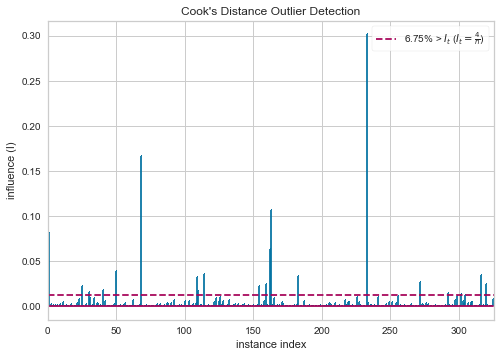

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [ ]:
from yellowbrick.regressor import CooksDistance
visualizer = CooksDistance()
visualizer.fit(x_train,y_train)
visualizer.show()

In [ ]:
visualizer.influence_threshold_

0.012269938650306749

In [ ]:
d = visualizer.distance_
d

0      0.025415
1      0.081098
2      0.002902
3      0.000725
4      0.001223
         ...   
321    0.001709
322    0.000026
323    0.000195
324    0.000197
325    0.007915
Length: 326, dtype: float64

In [ ]:
out = []
for i,j in enumerate(d):
    if j > visualizer.influence_threshold_:
        out.append(i)

In [ ]:
print(out)

[0, 1, 25, 30, 40, 50, 68, 109, 110, 114, 154, 159, 162, 163, 183, 233, 272, 292, 302, 305, 316, 320]


In [ ]:
x_train_new = x_train.drop(index=out)

In [ ]:
y_train_new = y_train.drop(index=out)

In [ ]:
x_train_new.shape,y_train_new.shape

((304, 13), (304,))

In [ ]:
x_train_new.reset_index(drop=True,inplace=True)
y_train_new.reset_index(drop=True,inplace=True)

In [ ]:
infl = lm.get_influence()

In [ ]:
cook_diff = infl.summary_frame()
cook_diff

,dfb_Intercept,dfb_crim,dfb_zn,dfb_indus,dfb_chas,dfb_nox,dfb_rm,dfb_age,dfb_dis,dfb_rad,dfb_tax,dfb_ptratio,dfb_black,dfb_lstat,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
342,-0.159980,1.045183,-0.084813,0.031982,0.019115,0.062003,0.135032,-0.027080,0.093573,-0.250200,0.039676,0.040034,0.234856,-0.079795,0.082593,1.006111,0.533210,1.075313,1.006131,1.075334
157,-0.118474,0.058340,-0.141335,0.207128,0.340803,-0.101353,0.291617,0.073916,0.088460,-0.130313,0.115291,-0.138424,0.017065,-0.051176,0.028590,1.737107,0.117110,0.632661,1.742769,0.634723
363,0.086472,0.033480,-0.010671,0.006553,0.035470,-0.003402,-0.088966,-0.002683,0.009844,-0.064582,0.000998,-0.013150,-0.110822,-0.078969,0.003657,-1.580992,0.020073,-0.226279,-1.584818,-0.226827
219,-0.035784,0.007964,-0.002513,-0.005320,0.010923,0.038949,0.026331,-0.051764,-0.033521,-0.029701,0.011771,0.045971,-0.004473,-0.002904,0.000669,-0.632789,0.022851,-0.096767,-0.632180,-0.096674
454,-0.008910,-0.016225,-0.007660,-0.074359,-0.002862,0.053032,0.004164,-0.136336,-0.095947,-0.057449,0.042683,0.044344,0.023254,0.048333,0.002404,1.042770,0.030020,0.183449,1.042917,0.183474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.012467,0.000085,0.000835,0.006149,-0.033055,-0.010954,-0.003763,0.002060,-0.005551,-0.000781,-0.004038,-0.008228,-0.007469,-0.001572,0.000121,-0.155585,0.065395,-0.041156,-0.155342,-0.041091
192,0.005267,0.001645,-0.014857,0.003737,0.082743,-0.015791,0.001084,-0.012412,0.000792,-0.001556,-0.003441,0.004130,-0.004183,0.017579,0.000602,0.366271,0.059151,0.091839,0.365763,0.091711
117,-0.016959,0.004586,0.008530,0.018220,0.000985,0.008395,0.013634,0.006121,0.016275,0.018603,-0.024949,0.011184,-0.002356,0.000575,0.000124,-0.296213,0.019342,-0.041600,-0.295780,-0.041539
47,-0.002404,0.001348,0.020462,-0.003402,0.005085,0.015918,-0.004277,-0.024768,-0.026973,-0.010783,0.011096,0.015807,-0.003988,-0.019659,0.000225,-0.290665,0.035891,-0.056082,-0.290238,-0.056000


In [ ]:
cook_diff[['cooks_d','dffits']]

,cooks_d,dffits
342,0.082593,1.075334
157,0.028590,0.634723
363,0.003657,-0.226827
219,0.000669,-0.096674
454,0.002404,0.183474
...,...,...
323,0.000121,-0.041091
192,0.000602,0.091711
117,0.000124,-0.041539
47,0.000225,-0.056000


In [ ]:
# assignment
# drop influencial obs
# apply PC
# build model

In [ ]:
sc_p = StandardScaler().fit(x_train_new)
scaled_train = sc_p.transform(x_train_new)

In [ ]:
pc_1 = PCA()

In [ ]:
pc_1.fit(scaled_train)

PCA()

In [ ]:
pc_train_arr_new = pc_1.transform(scaled_train)
pc_train_arr_new

array([[ 3.41994153,  0.59142018,  0.34658057, ..., -0.18281532,
         0.30034654, -0.08643688],
       [-2.13179637,  0.13898055, -0.40310985, ..., -0.01916988,
        -0.37453235, -0.18226386],
       [-0.12100538, -0.81160501, -0.5995778 , ..., -0.53390948,
         0.7392211 ,  0.1784803 ],
       ...,
       [-0.01969949, -0.99914143, -0.44424355, ..., -0.54710212,
        -0.05760406,  0.2914674 ],
       [-1.07132832, -1.16625887, -0.72247807, ...,  0.23036929,
        -0.0444181 , -0.17219378],
       [-1.78187214, -0.63308531,  1.37390256, ..., -0.094493  ,
        -0.34934084, -0.14126812]])

In [ ]:
pc_train_new = pd.DataFrame(pc_train_arr_new,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
pc_train_new['medv'] = y_train_new.values

In [ ]:
pc_train_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,medv
0,3.419942,0.591420,0.346581,-0.158860,-0.517019,-0.983177,-0.516873,0.223133,-0.057770,0.351814,-0.182815,0.300347,-0.086437,12.1
1,-2.131796,0.138981,-0.403110,0.234150,1.077532,-0.205584,-0.455107,0.237376,-0.452664,0.479475,-0.019170,-0.374532,-0.182264,20.1
2,-0.121005,-0.811605,-0.599578,-0.166888,-0.160321,-0.111762,0.713804,-0.059554,0.099534,-0.498277,-0.533909,0.739221,0.178480,24.5
3,-0.436067,-1.273643,-0.952307,0.035877,0.585590,0.323439,-0.248734,0.242222,0.051449,0.474078,-0.059575,0.054211,-0.196706,22.5
4,-1.833185,-0.401964,-1.237978,0.297858,-0.729370,0.377151,0.530703,0.296961,-0.241228,-0.310571,0.681588,0.465751,-0.189794,21.1


In [ ]:
scaled_test = sc_p.transform(x_test)
pc_test_arr_new = pc_1.transform(scaled_test)
pc_test_new = pd.DataFrame(pc_test_arr_new,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
pc_train_new['medv'] = y_train_new.values
pc_test_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.226929,0.618353,-0.282006,0.124997,-0.028140,-0.017415,-0.553301,-0.101722,-0.230603,0.948737,-0.759958,0.053871,-0.218803
1,4.244183,1.344498,0.122514,0.264387,-0.177858,-1.457840,-0.624906,2.065584,1.252811,0.238756,0.136738,0.175781,0.181307
2,1.656830,-1.474064,-0.553745,-0.384623,-0.450714,0.029940,-0.606376,-1.123999,0.729095,-0.144461,0.047298,-0.094570,0.178835
3,-1.518359,-0.807035,0.227212,-0.766750,-0.269935,0.330553,0.088361,0.769606,-0.231484,-0.245309,-0.366613,-0.023104,0.172124
4,7.767506,6.019552,-0.312472,1.074678,1.758572,0.697108,0.186859,7.450734,4.775602,-1.940705,2.776696,-2.285061,1.271425


In [ ]:
lm_pc_new = ols('medv~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+PC11+PC12+PC13',data=pc_train_new).fit()

In [ ]:
lm_pc_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     130.5
Date:                Fri, 16 Apr 2021   Prob (F-statistic):          8.68e-113
Time:                        21:53:24   Log-Likelihood:                -715.47
No. Observations:                 304   AIC:                             1459.
Df Residuals:                     290   BIC:                             1511.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.1046      0.150    141.154      0.000      20.810      21.399
PC1           -2.0225      0.060    -33.735      0.000      -2.140      -1.904
PC2            0.3131      0.122      2.558      0.011       0.072       0.554
PC3            2.5336      0.138     18.325      0.000       2.261       2.806
PC4           -1.0087      0.156     -6.449      0.000      -1.316      -0.701
PC5           -1.4983      0.166     -9.020      0.000      -1.825      -1.171
PC6           -0.9171      0.180     -5.100      0.000      -1.271      -0.563
PC7            1.1481      0.221      5.201      0.000       0.714       1.583
PC8           -0.2285      0.231     -0.989      0.324      -0.684       0.226
PC9            0.1372      0.301      0.456      0.648      -0.455       0.729
PC10          -0.6655      0.324     -2.055      0.041      -1.303      -0.028
PC11          -1.6045      0.368     -4.359      0.000      -2.329      -0.880
PC12          -0.0929      0.395     -0.236      0.814      -0.870       0.684
PC13          -2.4286      0.618     -3.929      0.000      -3.645      -1.212
==============================================================================
Omnibus:                       10.564   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.712
Skew:                           0.450   Prob(JB):                      0.00472
Kurtosis:                       3.190   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
test_pred_pc = lm_pc_new.predict(pc_test_new)
train_pred_pc = lm_pc_new.predict(pc_train_new)

In [ ]:
np.sqrt(mean_squared_error(y_test,test_pred_pc)),np.sqrt(mean_squared_error(y_train_new,train_pred_pc))

(4.956990365423043, 2.546149964740705)

# 15/04/2020

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
import pydataset
df = pydataset.data('Boston')

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
sgdreg = SGDRegressor(penalty='elasticnet',max_iter=1000,random_state=1000,verbose=True)
# Loss = error term we can use MSE also
# Penalty = bydefaut is Ridge L2
# alpha = 0.0001 mean in elastic lasso will be cancelled so will have only ridge l2
# l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Only used if `penalty` is 'elasticnet'.
# fit_intercept = True ,it will find Beta 0 also
# epoch -> means for every iteration data is taken randomly from train data that random data is called epoch
# Shuffle = True mean for every epoch when epoch estimate the Bo so it needs to be shuffled so as to get unbaised estimate
# Verbose -> will show what is happening in the backend
# warm_start -> used when our max iter is 100 algorithm runs and gives us the estimates but when we want to run it for 200 iterations
# we use warm_start so next time when the algorithm runs it will not repeat the previous iterations. it will continue from it
# early stopping -> suppose if we reach least cost fun before the max iter it will check randomly if no further reduction in cost
# it will stop there itself instead of running all the max iter which saves time

In [ ]:
x = df.iloc[:,:-1]

In [ ]:
y = df.medv

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
sgdreg.fit(x_train,y_train)

-- Epoch 1
Norm: 1999999189409.40, NNZs: 13, Bias: -8266463021.714456, T: 354, Avg. loss: 190138896989584995273909731328.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 836728129681.40, NNZs: 13, Bias: -3793445862.359491, T: 708, Avg. loss: 91540922891859913950260887552.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2084903629433.04, NNZs: 13, Bias: -11234828973.332525, T: 1062, Avg. loss: 72887509651651656625686577152.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2068659475282.18, NNZs: 13, Bias: -15340823415.934946, T: 1416, Avg. loss: 60625219984057226018418589696.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1518747987067.13, NNZs: 13, Bias: -12389727366.899286, T: 1770, Avg. loss: 55733162707309531378135072768.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1774881796600.48, NNZs: 13, Bias: -9867455221.660280, T: 2124, Avg. loss: 48144802626440241943947509760.000000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 1994

SGDRegressor(penalty='elasticnet', random_state=1000, verbose=True)

In [ ]:
sgdreg.coef_

array([-3.13466421e+11,  4.11455055e+11,  1.45677634e+11, -4.38957012e+10,
       -6.91287487e+09, -2.41228613e+11,  6.03313183e+10, -2.90291279e+11,
       -8.12616042e+10, -8.91651595e+10, -1.28942251e+11, -4.23844409e+11,
       -4.56674550e+11])

In [ ]:
pred_test = sgdreg.predict(x_test)
pred_train = sgdreg.predict(x_train)

In [ ]:
# we dont need nomality of y whie doing SGD why because here we dont have any statistical assumptions so no need to check y normality
# when our response variable is not normal then use MAE as cost function
np.sqrt(mean_squared_error(y_train,pred_train)),np.sqrt(mean_squared_error(y_test,pred_test))

(193524656407357.56, 191907094286730.28)

# 16/04/2020

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

In [ ]:
sgdr = SGDRegressor(early_stopping=True)
param_grid = {'loss':['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'],'penalty':['L1','L2','elasticnet'],
              'alpha':np.linspace(0.0001,1,5),'epsilon':np.linspace(0.1,1,5),
                                                               'learning_rate':['invscaling','constant','optimal','adaptive']}

In [ ]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=10,n_repeats=10)

In [ ]:
grid_model = GridSearchCV(estimator=sgdr,param_grid=param_grid,cv=5,n_jobs=-1) # all possible combination is GSCV

In [ ]:
import pydataset
df = pydataset.data('Boston')
x = df.iloc[:,:-1]
y = df.medv

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [ ]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(early_stopping=True), n_jobs=-1,
             param_grid={'alpha': array([1.00000e-04, 2.50075e-01, 5.00050e-01, 7.50025e-01, 1.00000e+00]),
                         'epsilon': array([0.1  , 0.325, 0.55 , 0.775, 1.   ]),
                         'learning_rate': ['invscaling', 'constant', 'optimal',
                                           'adaptive'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['L1', 'L2', 'elasticnet']})

In [ ]:
grid_model.best_estimator_

SGDRegressor(early_stopping=True, learning_rate='adaptive', loss='huber',
             penalty='L2')

In [ ]:
grid_model.best_params_

{'alpha': 0.0001,
 'epsilon': 0.1,
 'learning_rate': 'adaptive',
 'loss': 'huber',
 'penalty': 'L2'}

In [ ]:
sgdr_new = SGDRegressor(alpha=0.0001, epsilon=0.1, learning_rate='adaptive', loss='huber',
             penalty='L2')

In [ ]:
sgdr_new.fit(x_train,y_train)

SGDRegressor(learning_rate='adaptive', loss='huber', penalty='L2')

In [ ]:
sgdr_new.coef_

array([-0.10344326,  0.10025727, -0.28450358, -0.01079975,  0.00433625,
        0.27328237,  0.12474103,  0.16406152,  0.10307831,  0.00642443,
        0.18382682,  0.04173156, -0.74351036])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred = sgdr_new.predict(x_test)

In [ ]:
mse_test = mean_squared_error(y_test,y_pred)
mse_test

60.92056639178719

In [ ]:
y_train_pred = sgdr_new.predict(x_train)

In [ ]:
mse_train = mean_squared_error(y_train,y_train_pred)

In [ ]:
mse_train

47.48908167922223

In [ ]:
np.sqrt(mse_test),np.sqrt(mse_train)

(7.805162803669581, 6.89123223228054)